In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
import plotly as px
import seaborn as sns
import os
import openpyxl

In [2]:
df = pd.read_excel("S:\Projects\Industrial Copper Modelling\Copper_Set.xlsx")

In [3]:
df

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [5]:
# checking for null values
df.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [6]:
#  checking unique values

for i in df.columns:
    print(i,":",df[i].nunique())

id : 181671
item_date : 252
quantity tons : 181673
customer : 1169
country : 17
status : 9
item type : 7
application : 30
thickness : 594
width : 1386
material_ref : 16563
product_ref : 33
delivery date : 28
selling_price : 9795


In [7]:
df.dtypes

id                object
item_date        float64
quantity tons     object
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object

In [8]:
# converting the data types

df['quantity tons'] = pd.to_numeric(df['quantity tons'],errors="coerce")
df['item_date_1'] = pd.to_datetime(df['item_date'],format="%Y%m%d",errors='coerce').dt.date
df['delivery date_1'] = pd.to_datetime(df['delivery date'],format="%Y%m%d",errors='coerce').dt.date 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               181671 non-null  object 
 1   item_date        181672 non-null  float64
 2   quantity tons    181672 non-null  float64
 3   customer         181672 non-null  float64
 4   country          181645 non-null  float64
 5   status           181671 non-null  object 
 6   item type        181673 non-null  object 
 7   application      181649 non-null  float64
 8   thickness        181672 non-null  float64
 9   width            181673 non-null  float64
 10  material_ref     103754 non-null  object 
 11  product_ref      181673 non-null  int64  
 12  delivery date    181672 non-null  float64
 13  selling_price    181672 non-null  float64
 14  item_date_1      181670 non-null  object 
 15  delivery date_1  181670 non-null  object 
dtypes: float64(9), int64(1), object(6)
mem

In [10]:
df.isnull().sum()

id                     2
item_date              1
quantity tons          1
customer               1
country               28
status                 2
item type              0
application           24
thickness              1
width                  0
material_ref       77919
product_ref            0
delivery date          1
selling_price          1
item_date_1            3
delivery date_1        3
dtype: int64

In [11]:
# material ref and id is not required for this project so dropping them as they contain lot of null values

df.drop(columns=['id','material_ref'],inplace=True)

In [12]:
df.isnull().sum()

item_date           1
quantity tons       1
customer            1
country            28
status              2
item type           0
application        24
thickness           1
width               0
product_ref         0
delivery date       1
selling_price       1
item_date_1         3
delivery date_1     3
dtype: int64

In [13]:
# A rough look at the entire dataset in statistics pov
df.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,181672.0,2.020459e+07,4.551119e+03,19950000.00,2.020093e+07,2.020113e+07,2.021020e+07,2.021040e+07
quantity tons,181672.0,5.874926e+03,2.349081e+06,-2000.00,1.097030e+01,3.036464e+01,6.716061e+01,1.000000e+09
customer,181672.0,3.051221e+07,2.433382e+07,12458.00,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181645.0,4.489302e+01,2.440421e+01,25.00,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
application,181649.0,2.561581e+01,1.775417e+01,2.00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181672.0,2.564827e+00,6.572321e+00,0.18,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.00,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,611728.00,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09
delivery date,181672.0,2.020738e+07,2.411059e+04,20190401.00,2.020110e+07,2.021010e+07,2.021040e+07,3.031010e+07
selling_price,181672.0,1.918036e+03,3.317956e+05,-1160.00,6.690000e+02,8.120000e+02,9.530000e+02,1.000010e+08


In [14]:
# quanity tons and selling price have negative value so replacing them

df['quantity tons'] = df['quantity tons'].apply(lambda x:np.nan if x<=0 else x)
df['selling_price'] = df['selling_price'].apply(lambda x:np.nan if x<=0 else x)

In [15]:
df.nunique()

item_date             252
quantity tons      181668
customer             1169
country                17
status                  9
item type               7
application            30
thickness             594
width                1386
product_ref            33
delivery date          28
selling_price        9789
item_date_1           250
delivery date_1        26
dtype: int64

In [16]:
df.isnull().sum()

item_date           1
quantity tons       5
customer            1
country            28
status              2
item type           0
application        24
thickness           1
width               0
product_ref         0
delivery date       1
selling_price       8
item_date_1         3
delivery date_1     3
dtype: int64

# Handling null values with a statistic approach

In [17]:
#treating object values with mode

df['item_date'].fillna(df['item_date'].mode().iloc[0],inplace=True)
df['delivery date'].fillna(df['delivery date'].mode().iloc[0],inplace=True)
df['status'].fillna(df['status'].mode().iloc[0],inplace=True)
df['delivery date_1'].fillna(df['delivery date_1'].mode().iloc[0],inplace=True)
df['item_date_1'].fillna(df['item_date_1'].mode().iloc[0],inplace=True) 

In [18]:
df.isnull().sum()

item_date           0
quantity tons       5
customer            1
country            28
status              0
item type           0
application        24
thickness           1
width               0
product_ref         0
delivery date       0
selling_price       8
item_date_1         0
delivery date_1     0
dtype: int64

In [19]:
# treating numerical values with median

df['quantity tons'].fillna(df['quantity tons'].median(),inplace=True)
df['customer'].fillna(df['customer'].median(),inplace=True)
df['country'].fillna(df['country'].median(),inplace=True)
df['application'].fillna(df['application'].median(),inplace=True)
df['thickness'].fillna(df['thickness'].median(),inplace=True)
df['selling_price'].fillna(df['thickness'].median(),inplace=True)

In [20]:
df.isnull().sum()

item_date          0
quantity tons      0
customer           0
country            0
status             0
item type          0
application        0
thickness          0
width              0
product_ref        0
delivery date      0
selling_price      0
item_date_1        0
delivery date_1    0
dtype: int64

In [21]:
df.head(5)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,delivery date_1
0,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,20210701.0,854.00,2021-04-01,2021-07-01
1,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01
2,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,20210101.0,644.33,2021-04-01,2021-01-01
3,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,20210101.0,768.00,2021-04-01,2021-01-01
4,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,20210301.0,577.00,2021-04-01,2021-03-01


In [22]:
df['status'].unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable'], dtype=object)

# Encoding categorical columns

In [23]:
df['status'] = df['status'].map({'Won':1,'Draft':2,'To be approved':3,'Lost':0,'Not lost for AM':4,
                                 'Wonderful':5,'Revised':6,'Offered':7,'Offerable':8})

In [24]:
df['status'].unique()

array([1, 2, 3, 0, 4, 5, 6, 7, 8])

In [25]:
df['item type'] = OrdinalEncoder().fit_transform(df[['item type']])

In [26]:
df['item type'].unique()

array([5., 6., 3., 1., 2., 0., 4.])

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,181673.0,2.020459e+07,4.551114e+03,1.995000e+07,2.020093e+07,2.020113e+07,2.021020e+07,2.021040e+07
quantity tons,181673.0,5.874905e+03,2.349075e+06,1.000000e-05,1.097167e+01,3.036501e+01,6.716038e+01,1.000000e+09
customer,181673.0,3.051221e+07,2.433375e+07,1.245800e+04,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181673.0,4.489073e+01,2.440303e+01,2.500000e+01,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
status,181673.0,1.316684e+00,1.330310e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00
item type,181673.0,4.133036e+00,1.055230e+00,0.000000e+00,3.000000e+00,5.000000e+00,5.000000e+00,6.000000e+00
application,181673.0,2.561441e+01,1.775342e+01,2.000000e+00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181673.0,2.564822e+00,6.572303e+00,1.800000e-01,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.000000e+00,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,6.117280e+05,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09


In [28]:
df.to_csv("Industrial_Copper_Modelling_Cleaned.csv",index=False)

# Handling Skewness

In [29]:
def plot (df,column):
    plt.Figure(figsize=(15,4))
    plt.subplot(1,1,1)
    sns.histplot(df,x=column,kde=True,bins=30,color="salmon")
    plt.title("histogram for"+" "+column)
    plt.show()
    plt.close()


In [30]:
skewed_columns=['quantity tons', 'customer', 'country', 'status',
                'item type', 'application', 'thickness', 'width', 'product_ref',
                'selling_price']

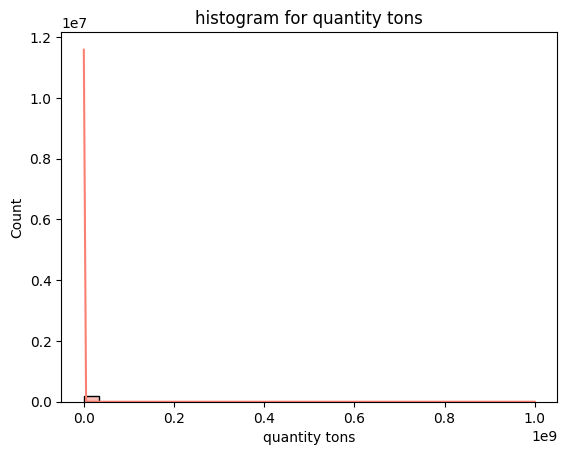

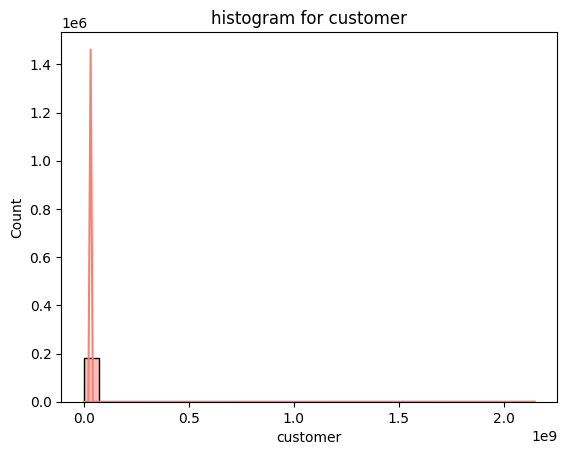

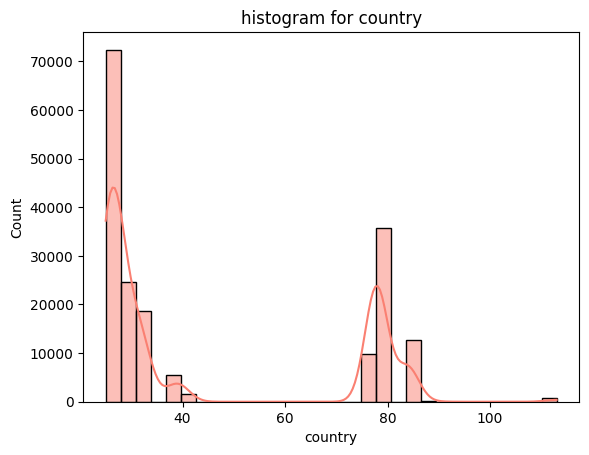

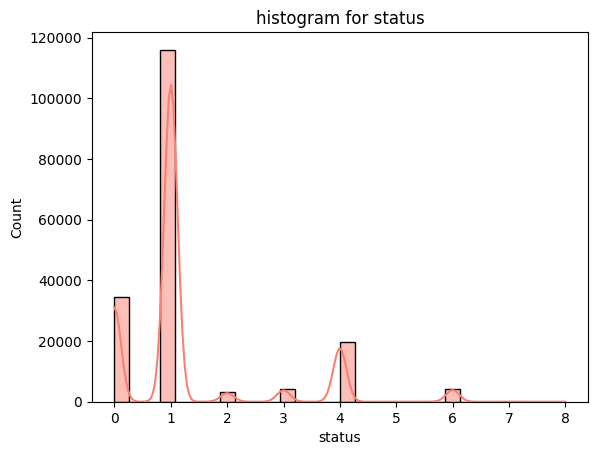

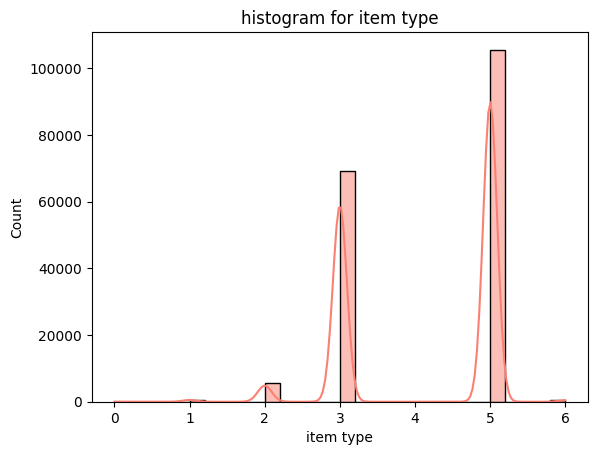

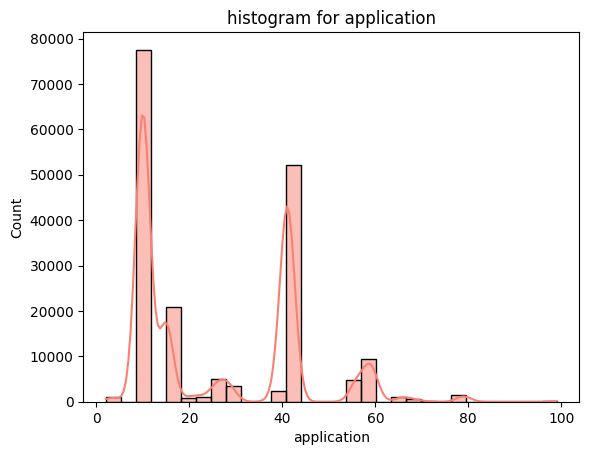

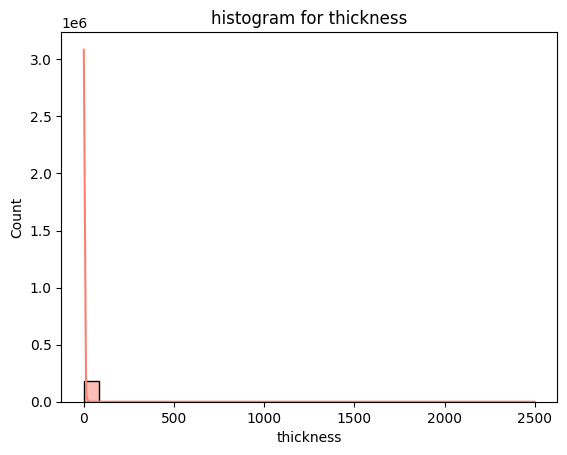

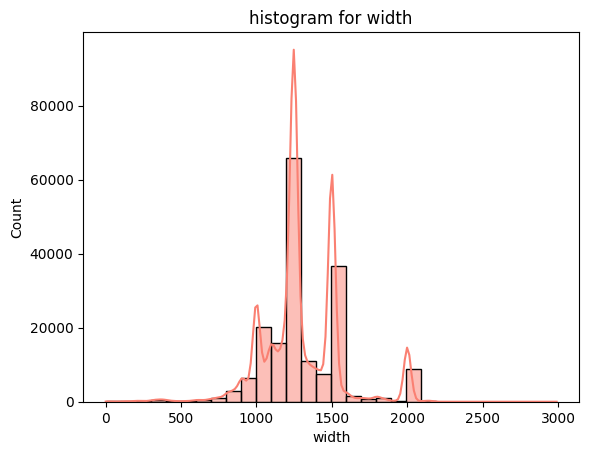

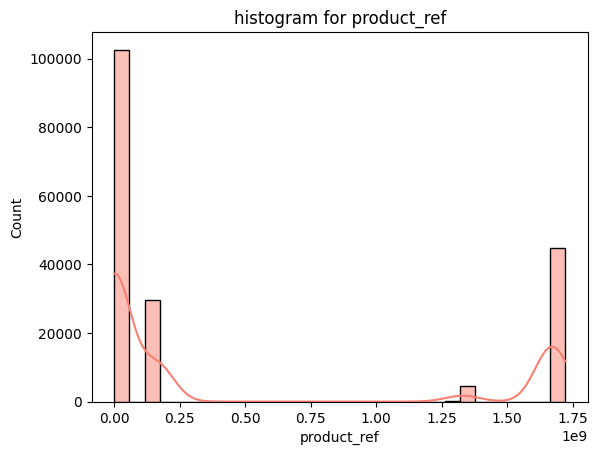

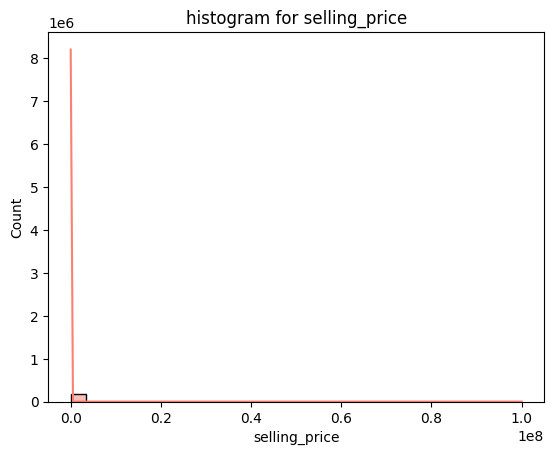

In [31]:
for i in skewed_columns:
    plot(df,i)

In [32]:
#skewed columns
# quantity tons
# customer
# thickness
# selling_price

In [33]:
df1 = df.copy()

In [34]:
df1.columns

Index(['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'delivery date', 'selling_price', 'item_date_1', 'delivery date_1'],
      dtype='object')

In [35]:
df1['quantity_tons_log'] = np.log(df1['quantity tons'])
df1['customer_log'] = np.log(df1['customer'])
df1['thickness_log'] = np.log(df1['thickness'])
df1['selling_price_log'] = np.log(df1['selling_price'])

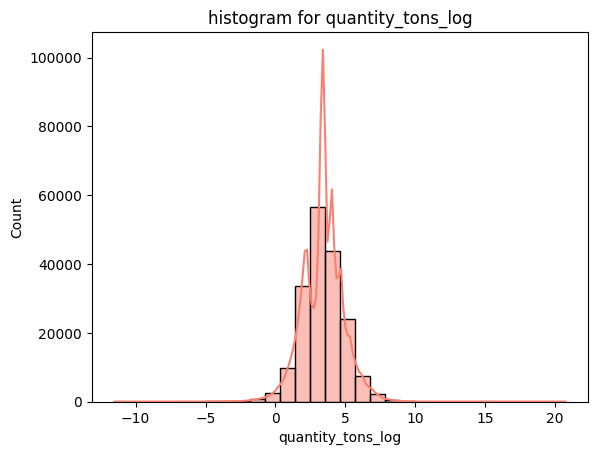

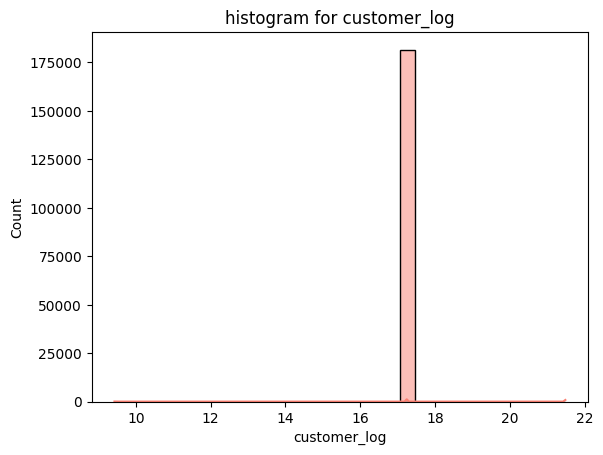

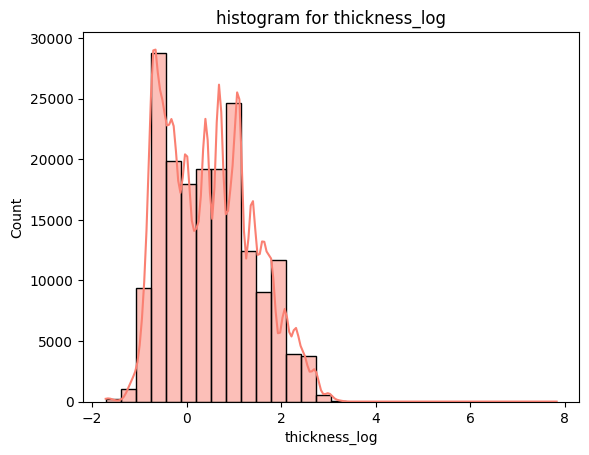

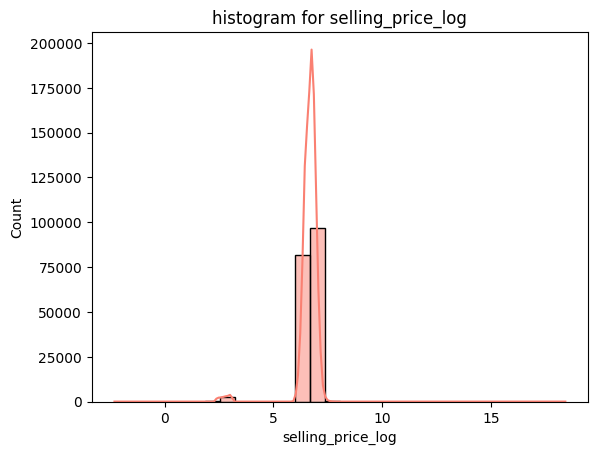

In [36]:
skewed_columns_2 = ['quantity_tons_log','customer_log','thickness_log','selling_price_log']
for i in skewed_columns_2:
    plot(df1,i)

# Handling outliers

In [37]:
df2 = df1.copy()

In [38]:
df2.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,delivery date_1,quantity_tons_log,customer_log,thickness_log,selling_price_log
0,20210401.0,54.151139,30156308.0,28.0,1,5.0,10.0,2.00,1500.0,1670798778,20210701.0,854.00,2021-04-01,2021-07-01,3.991779,17.221905,0.693147,6.749931
1,20210401.0,768.024839,30202938.0,25.0,1,5.0,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01,6.643822,17.223450,-0.223144,6.953684
2,20210401.0,386.127949,30153963.0,30.0,1,6.0,28.0,0.38,952.0,628377,20210101.0,644.33,2021-04-01,2021-01-01,5.956169,17.221827,-0.967584,6.468211
3,20210401.0,202.411065,30349574.0,32.0,1,3.0,59.0,2.30,1317.0,1668701718,20210101.0,768.00,2021-04-01,2021-01-01,5.310301,17.228293,0.832909,6.643790
4,20210401.0,785.526262,30211560.0,28.0,1,5.0,10.0,4.00,2000.0,640665,20210301.0,577.00,2021-04-01,2021-03-01,6.666354,17.223735,1.386294,6.357842


In [39]:
def outlier(df,column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)

    iqr = q3-q1

    upper_threshold = q3 + (1.5 * iqr)
    lower_threshold = q1 - (1.5 * iqr)

    df[column] = df[column].clip(lower_threshold, upper_threshold)

In [40]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,181673.0,2.020459e+07,4.551114e+03,1.995000e+07,2.020093e+07,2.020113e+07,2.021020e+07,2.021040e+07
quantity tons,181673.0,5.874905e+03,2.349075e+06,1.000000e-05,1.097167e+01,3.036501e+01,6.716038e+01,1.000000e+09
customer,181673.0,3.051221e+07,2.433375e+07,1.245800e+04,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181673.0,4.489073e+01,2.440303e+01,2.500000e+01,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
status,181673.0,1.316684e+00,1.330310e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00
item type,181673.0,4.133036e+00,1.055230e+00,0.000000e+00,3.000000e+00,5.000000e+00,5.000000e+00,6.000000e+00
application,181673.0,2.561441e+01,1.775342e+01,2.000000e+00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181673.0,2.564822e+00,6.572303e+00,1.800000e-01,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.000000e+00,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,6.117280e+05,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09


In [41]:
outlier_columns = ['selling_price_log','thickness_log','customer_log','quantity_tons_log','width','application']

for i in outlier_columns:
    outlier(df2,i)

In [42]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,181673.0,2.020459e+07,4.551114e+03,1.995000e+07,2.020093e+07,2.020113e+07,2.021020e+07,2.021040e+07
quantity tons,181673.0,5.874905e+03,2.349075e+06,1.000000e-05,1.097167e+01,3.036501e+01,6.716038e+01,1.000000e+09
customer,181673.0,3.051221e+07,2.433375e+07,1.245800e+04,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181673.0,4.489073e+01,2.440303e+01,2.500000e+01,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
status,181673.0,1.316684e+00,1.330310e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00
item type,181673.0,4.133036e+00,1.055230e+00,0.000000e+00,3.000000e+00,5.000000e+00,5.000000e+00,6.000000e+00
application,181673.0,2.560516e+01,1.771817e+01,2.000000e+00,1.000000e+01,1.500000e+01,4.100000e+01,8.750000e+01
thickness,181673.0,2.564822e+00,6.572303e+00,1.800000e-01,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.297046e+03,2.489619e+02,7.000000e+02,1.180000e+03,1.250000e+03,1.500000e+03,1.980000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,6.117280e+05,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09


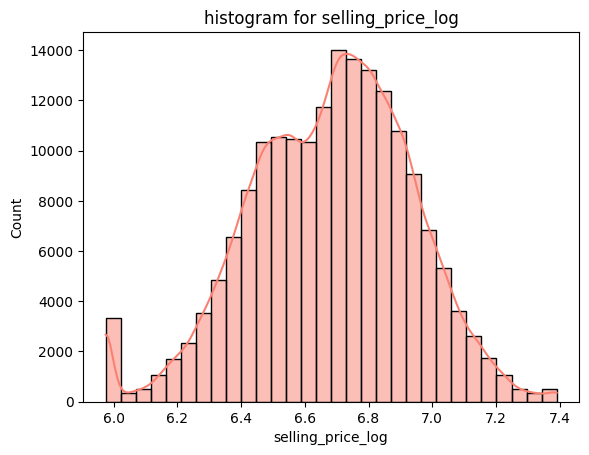

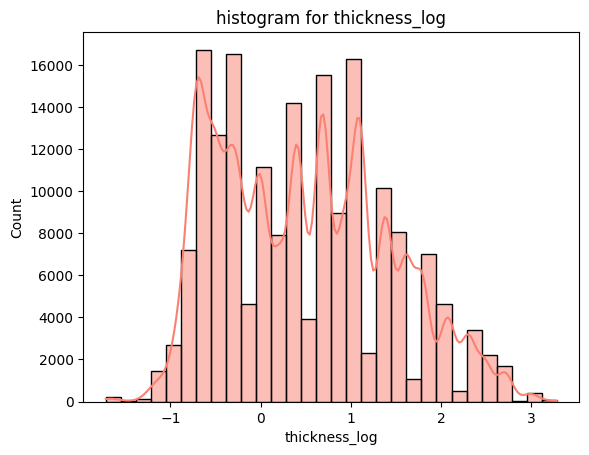

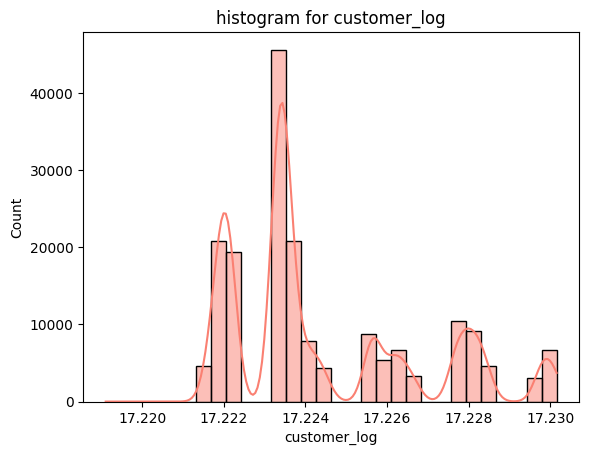

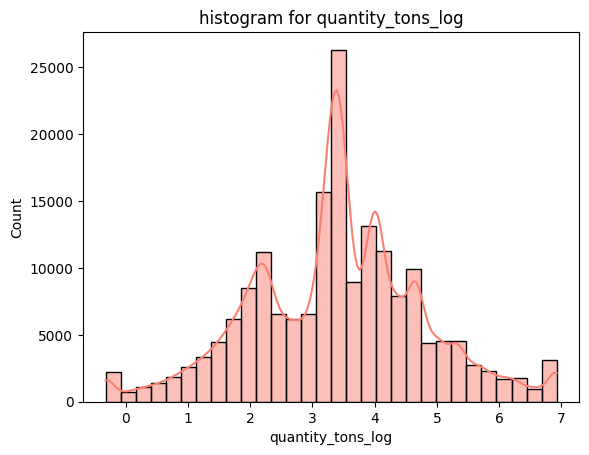

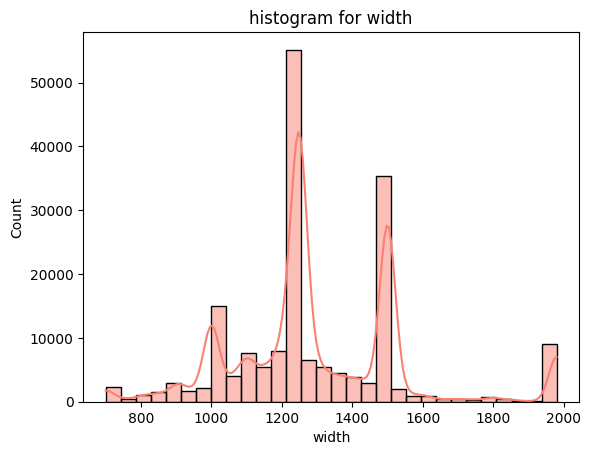

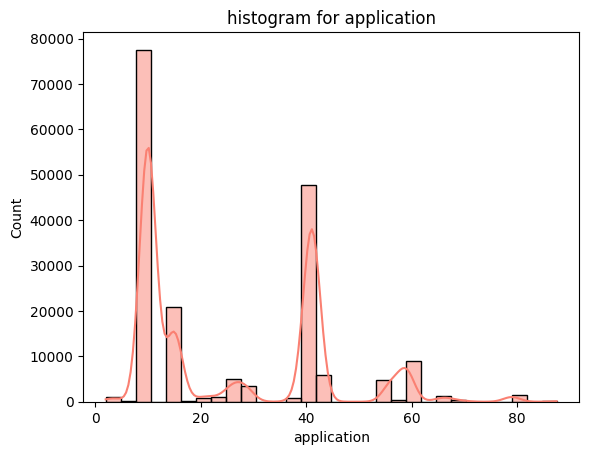

In [43]:
for i in outlier_columns:
    plot(df2,i)

In [44]:
# dropping unwanted skewed columns
# quantity_tons
# customer
# thickness
# selling_price

df3 = df2.drop(columns=['quantity tons','customer','thickness','selling_price'])

In [45]:
df3.head()

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity_tons_log,customer_log,thickness_log,selling_price_log
0,20210401.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,17.221905,0.693147,6.749931
1,20210401.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,17.223450,-0.223144,6.953684
2,20210401.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,17.221827,-0.967584,6.468211
3,20210401.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,17.228293,0.832909,6.643790
4,20210401.0,28.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,2021-03-01,6.666354,17.223735,1.386294,6.357842


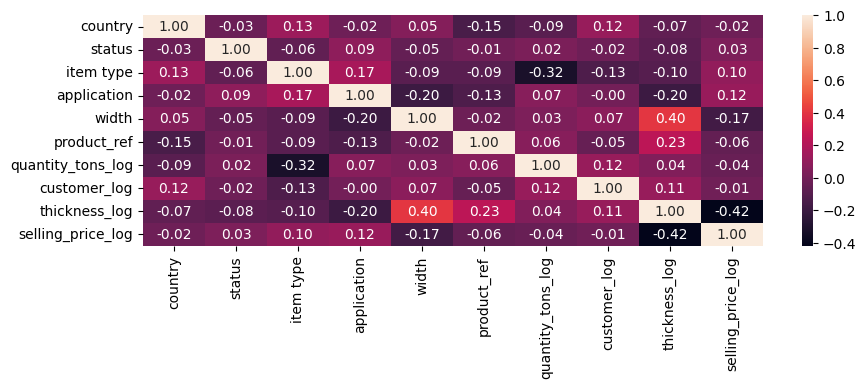

In [46]:
# checking the correlation between datasets

corr = df3.drop(columns=['item_date','delivery date','item_date_1','delivery date_1']).corr()
plt.figure(figsize=(10,3))
sns.heatmap(corr,annot=True,fmt="0.2f")
plt.show()

In [47]:
# - 0.42 -> thickness and selling price
# 0.40 -> thickness and width
# - 0.32 -> quantity tons and item type

# Handling wrong delivery date

In [48]:
df4 = df3.copy()

In [49]:
df4.head()

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity_tons_log,customer_log,thickness_log,selling_price_log
0,20210401.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,17.221905,0.693147,6.749931
1,20210401.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,17.223450,-0.223144,6.953684
2,20210401.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,17.221827,-0.967584,6.468211
3,20210401.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,17.228293,0.832909,6.643790
4,20210401.0,28.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,2021-03-01,6.666354,17.223735,1.386294,6.357842


In [50]:
df4.dtypes

item_date            float64
country              float64
status                 int64
item type            float64
application          float64
width                float64
product_ref            int64
delivery date        float64
item_date_1           object
delivery date_1       object
quantity_tons_log    float64
customer_log         float64
thickness_log        float64
selling_price_log    float64
dtype: object

In [51]:
#changing the data type for date

df4['delivery date_1'] = pd.to_datetime(df4['delivery date_1'])
df4['item_date_1'] = pd.to_datetime(df4['item_date_1'])

In [52]:
# finding the difference between delivery date and item date

df4['date_differ'] = (df4['delivery date_1'] - df4['item_date_1'] ).dt.days

In [53]:
df4['date_differ']

0         91
1          0
2        -90
3        -90
4        -31
          ..
181668    -1
181669    -1
181670    -1
181671    -1
181672    -1
Name: date_differ, Length: 181673, dtype: int64

In [54]:
# there are negative values so it is clear that the delivery date data is wrong
# let's use ML model to predict the dates

df4['item_date_day'] = df4['item_date_1'].dt.day
df4['item_date_month'] = df4['item_date_1'].dt.month
df4['item_date_year'] = df4['item_date_1'].dt.year

In [55]:
df4.head()

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity_tons_log,customer_log,thickness_log,selling_price_log,date_differ,item_date_day,item_date_month,item_date_year
0,20210401.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,17.221905,0.693147,6.749931,91,1,4,2021
1,20210401.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,17.223450,-0.223144,6.953684,0,1,4,2021
2,20210401.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,17.221827,-0.967584,6.468211,-90,1,4,2021
3,20210401.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,17.228293,0.832909,6.643790,-90,1,4,2021
4,20210401.0,28.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,2021-03-01,6.666354,17.223735,1.386294,6.357842,-31,1,4,2021


In [56]:
df4_post_val = df4[df4['date_differ'] >=0 ]
df4_post_val.reset_index(drop=True,inplace=True)

In [57]:
df4_post_val.tail()

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity_tons_log,customer_log,thickness_log,selling_price_log,date_differ,item_date_day,item_date_month,item_date_year
165560,20200702.0,25.0,0,3.0,15.0,1980.0,640665,20200801.0,2020-07-02,2020-08-01,3.472467,17.224270,1.791759,6.313548,30,2,7,2020
165561,20200702.0,30.0,0,3.0,10.0,1525.0,640665,20200801.0,2020-07-02,2020-08-01,4.196171,17.222079,1.348073,6.126869,30,2,7,2020
165562,20200702.0,30.0,0,3.0,10.0,1525.0,640665,20200801.0,2020-07-02,2020-08-01,4.156686,17.222079,1.766442,6.124683,30,2,7,2020
165563,20200702.0,30.0,0,3.0,10.0,1500.0,640665,20200801.0,2020-07-02,2020-08-01,4.025862,17.222079,2.060514,6.126869,30,2,7,2020
165564,20200702.0,30.0,0,3.0,10.0,1830.0,640665,20200801.0,2020-07-02,2020-08-01,5.328963,17.222079,1.348073,6.131226,30,2,7,2020


In [58]:
df4_neg_val = df4[df4['date_differ'] <=0 ]
df4_neg_val.reset_index(drop=True,inplace=True)

In [59]:
df4_neg_val.tail()

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity_tons_log,customer_log,thickness_log,selling_price_log,date_differ,item_date_day,item_date_month,item_date_year
16563,20200702.0,25.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-07-01,4.629691,17.223381,-0.040822,6.381816,-1,2,7,2020
16564,20200702.0,25.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-07-01,5.337954,17.223381,-0.051293,6.378426,-1,2,7,2020
16565,20200702.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,1.443523,17.223381,-0.342490,6.428105,-1,2,7,2020
16566,20200702.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,3.413291,17.223381,-0.162519,6.398595,-1,2,7,2020
16567,20200702.0,25.0,1,5.0,41.0,1240.0,164141591,20200701.0,2020-07-02,2020-07-01,6.008043,17.223381,-0.342490,6.408529,-1,2,7,2020


In [60]:
# model for delivery date prediction

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [61]:
# checking which algorithm would fit for this case

def date_prediction(df,algorithm):
    x = df.drop(columns=['item_date_1','delivery date_1','date_differ'])
    y = df['date_differ']

    #train test split

    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

    model = algorithm().fit(x_train,y_train)
    y_pred = model.predict(x_test)

    #checking scores

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test,y_pred)
    r2 = r2_score(y_test,y_pred)

    metrics = {"r2_score":r2,
               "mean_squared_error":mse,
               "root_mean_squared_error":rmse,
               "mean_absolute_error":mae}
    return metrics
    

In [62]:
print(date_prediction(df4_post_val,DecisionTreeRegressor))
print(date_prediction(df4_post_val,RandomForestRegressor))
print(date_prediction(df4_post_val,ExtraTreesRegressor))
print(date_prediction(df4_post_val,GradientBoostingRegressor))
print(date_prediction(df4_post_val,AdaBoostRegressor))
print(date_prediction(df4_post_val,XGBRegressor))

{'r2_score': 0.9972694191356696, 'mean_squared_error': 4.236463020565941, 'root_mean_squared_error': np.float64(2.0582669944800505), 'mean_absolute_error': 0.014979011264458067}
{'r2_score': 0.9972014106597892, 'mean_squared_error': 4.3419773442454614, 'root_mean_squared_error': np.float64(2.083741189362408), 'mean_absolute_error': 0.0169588983178812}
{'r2_score': 0.9992138781274503, 'mean_squared_error': 1.2196585298825235, 'root_mean_squared_error': np.float64(1.1043815146418032), 'mean_absolute_error': 0.017991423308066364}
{'r2_score': 0.9879013122462357, 'mean_squared_error': 18.770966989386196, 'root_mean_squared_error': np.float64(4.3325474018625805), 'mean_absolute_error': 2.9478799885143645}
{'r2_score': 0.7033898136059222, 'mean_squared_error': 460.18709886835626, 'root_mean_squared_error': np.float64(21.451971910953926), 'mean_absolute_error': 17.61464809043122}
{'r2_score': 0.999013364315033, 'mean_squared_error': 1.5307917594909668, 'root_mean_squared_error': np.float64(1.

In [63]:
def ExtraTrees(train_df,test_df):
    x = train_df.drop(columns = ['item_date_1','delivery date_1','date_differ'])
    y = train_df['date_differ']

    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
    model = ExtraTreesRegressor().fit(x_train,y_train)

    data = test_df.drop(columns = ['item_date_1','delivery date_1','date_differ'])
    y_pred = model.predict(data)
    return y_pred

In [64]:
date_differ = ExtraTrees(df4_post_val,df4_neg_val)

In [65]:
date_differ

array([ 0.  , 16.04, 20.22, ..., 29.66, 29.82, 29.81], shape=(16568,))

In [66]:
# the output is in float changing to int

date_diff = []
for i in date_differ:
    dd = int(round(i,0))
    date_diff.append(dd)

In [67]:
date_diff

[0,
 16,
 20,
 6,
 0,
 16,
 0,
 16,
 16,
 0,
 16,
 0,
 0,
 16,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 193,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 8,
 9,
 3,
 3,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 18,
 18,
 18,
 17,
 17,
 3,
 2,
 3,
 3,
 3,
 3,
 15,
 15,
 15,
 15,
 15,
 13,
 15,
 15,
 15,
 15,
 3,
 19,
 13,
 13,
 15,
 14,
 14,
 14,
 5,
 5,
 5,
 13,
 18,
 21,
 21,
 21,
 14,
 14,
 12,
 23,
 23,
 23,
 7,
 7,
 7,
 19,
 19,
 8,
 8,
 8,
 8,
 13,
 13,
 13,
 13,
 13,
 6,
 7,
 22,
 22,
 19,
 17,
 17,
 19,
 22,
 21,
 21,
 21,
 21,
 21,
 21,
 22,
 22,
 22,
 8,
 8,
 8,
 8,
 8,
 19,
 7,
 8,
 8,
 19,
 19,
 20,
 20,
 20,
 21,
 8,
 8,
 10,
 25,
 12,
 22,
 22,
 23,
 11,
 11,
 11,
 11,
 11,
 24,
 24,
 26,
 26,
 13,
 26,
 25,
 26,
 23,
 26,
 20,
 26,
 12,
 26,
 26,
 11,
 25,
 24,
 24,
 26,
 26,
 18,
 18,
 11,
 28,
 25,
 27,
 25,
 26,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 26,
 26,
 26,
 12,

In [68]:
df4_neg_val['date_differ'] = pd.DataFrame(date_diff)

In [73]:
df4_neg_val

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity_tons_log,customer_log,thickness_log,selling_price_log,date_differ,item_date_day,item_date_month,item_date_year
0,20210401.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,17.223450,-0.223144,6.953684,0,1,4,2021
1,20210401.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-04-17,5.956169,17.221827,-0.967584,6.468211,16,1,4,2021
2,20210401.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-04-21,5.310301,17.228293,0.832909,6.643790,20,1,4,2021
3,20210401.0,28.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,2021-04-07,6.666354,17.223735,1.386294,6.357842,6,1,4,2021
4,20210401.0,25.0,1,5.0,41.0,1265.0,1668701718,20210401.0,2021-04-01,2021-04-01,5.419608,17.223450,0.405465,6.890609,0,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16563,20200702.0,25.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-08-01,4.629691,17.223381,-0.040822,6.381816,30,2,7,2020
16564,20200702.0,25.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-08-01,5.337954,17.223381,-0.051293,6.378426,30,2,7,2020
16565,20200702.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-08-01,1.443523,17.223381,-0.342490,6.428105,30,2,7,2020
16566,20200702.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-08-01,3.413291,17.223381,-0.162519,6.398595,30,2,7,2020


In [69]:
df4_neg_val.isnull().sum()

item_date            0
country              0
status               0
item type            0
application          0
width                0
product_ref          0
delivery date        0
item_date_1          0
delivery date_1      0
quantity_tons_log    0
customer_log         0
thickness_log        0
selling_price_log    0
date_differ          0
item_date_day        0
item_date_month      0
item_date_year       0
dtype: int64

In [70]:
# finding the correct delivery date using item_date and date differ

def getting_delivery_date(item_date,date_differ):
    date = item_date + pd.to_timedelta(date_differ,unit="D")
    return date

In [71]:
df4_neg_val['delivery date_1'] = getting_delivery_date(df4_neg_val['item_date_1'],df4_neg_val['date_differ'])

In [72]:
df_final = pd.concat([df4_post_val,df4_neg_val],axis = 0, ignore_index=True)
df_final.tail()

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity_tons_log,customer_log,thickness_log,selling_price_log,date_differ,item_date_day,item_date_month,item_date_year
182128,20200702.0,25.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-08-01,4.629691,17.223381,-0.040822,6.381816,30,2,7,2020
182129,20200702.0,25.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-08-01,5.337954,17.223381,-0.051293,6.378426,30,2,7,2020
182130,20200702.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-08-01,1.443523,17.223381,-0.342490,6.428105,30,2,7,2020
182131,20200702.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-08-01,3.413291,17.223381,-0.162519,6.398595,30,2,7,2020
182132,20200702.0,25.0,1,5.0,41.0,1240.0,164141591,20200701.0,2020-07-02,2020-08-01,6.008043,17.223381,-0.342490,6.408529,30,2,7,2020


In [76]:
df_final['delivery_date_day'] = df_final['delivery date_1'].dt.day
df_final['delivery_date_month'] = df_final['delivery date_1'].dt.month
df_final['delivery_date_year'] = df_final['delivery date_1'].dt.year

In [77]:
df_final

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,...,customer_log,thickness_log,selling_price_log,date_differ,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,20210401.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,...,17.221905,0.693147,6.749931,91,1,4,2021,1,7,2021
1,20210401.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,...,17.223450,-0.223144,6.953684,0,1,4,2021,1,4,2021
2,20210401.0,25.0,1,5.0,41.0,1265.0,1668701718,20210401.0,2021-04-01,2021-04-01,...,17.223450,0.405465,6.890609,0,1,4,2021,1,4,2021
3,20210401.0,30.0,2,5.0,41.0,1125.0,611993,20210701.0,2021-04-01,2021-07-01,...,17.223667,-0.967584,5.975038,91,1,4,2021,1,7,2021
4,20210401.0,38.0,1,3.0,10.0,1275.0,1668701376,20210701.0,2021-04-01,2021-07-01,...,17.228025,-0.510826,7.217443,91,1,4,2021,1,7,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182128,20200702.0,25.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-08-01,...,17.223381,-0.040822,6.381816,30,2,7,2020,1,8,2020
182129,20200702.0,25.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-08-01,...,17.223381,-0.051293,6.378426,30,2,7,2020,1,8,2020
182130,20200702.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-08-01,...,17.223381,-0.342490,6.428105,30,2,7,2020,1,8,2020
182131,20200702.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-08-01,...,17.223381,-0.162519,6.398595,30,2,7,2020,1,8,2020


In [78]:
# we have the delivery date required
# now we can drop the unwanted columns and proceed further

df_final.drop(columns=['item_date','delivery date','item_date_1','delivery date_1','date_differ'],inplace=True)

In [80]:
df_final.columns

Index(['country', 'status', 'item type', 'application', 'width', 'product_ref',
       'quantity_tons_log', 'customer_log', 'thickness_log',
       'selling_price_log', 'item_date_day', 'item_date_month',
       'item_date_year', 'delivery_date_day', 'delivery_date_month',
       'delivery_date_year'],
      dtype='object')

In [83]:
df_final.to_csv("Industrial_Copper_Modelling_Ready.csv",index=False)

In [ ]:
# the delivery date part is completed
# with this all the necessary preprocessing steps are completed 
# the file is now ready for actual requirement

# Win or Lose

In [81]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,auc,roc_curve,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import pickle
from imblearn.combine import SMOTETomek

In [82]:
df_class = df_final.copy()